K-Means - California Housing

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score
from pickle import dump
import os

1. DATA COLLECTION

In [99]:
df_raw = pd.read_csv("../data/raw/df_raw.csv")
df_raw.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


1.1. DATA CLEAN-UP

In [100]:
df_raw_filtered = df_raw[["MedInc", "Latitude", "Longitude"]]
df_raw_filtered.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [101]:
# FILTERED TRAIN AND TEST
X_train, X_test = train_test_split(df_raw_filtered, test_size = 0.2, random_state = 42)
X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


2. K-MEANS MODEL

In [102]:
# 2.1. TRAIN MODEL
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [103]:
# 2.2. INCLUDE CUSTERS IN NEW COLUMN
y_train = list(model.labels_)
X_train["Cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,Cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


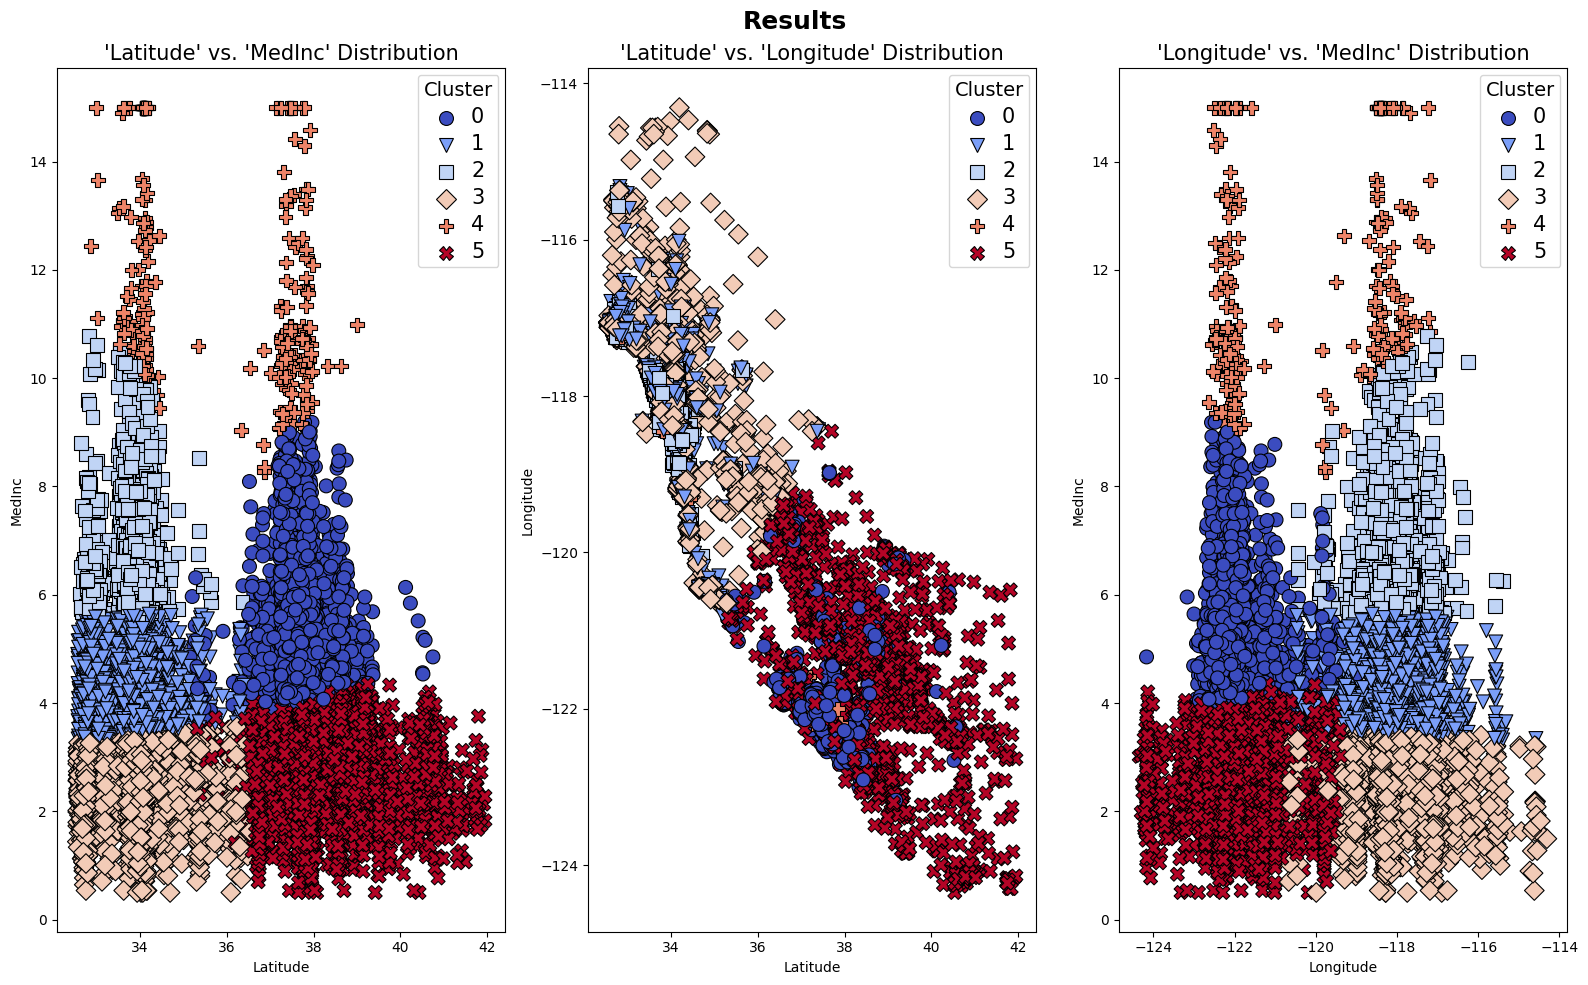

In [104]:
fig, axis = plt.subplots(1, 3, figsize=(16, 10))
fig.suptitle("Results", fontsize=18, fontweight='bold')

markers = {0: "o", 1: "v", 2: "s", 3: "D", 4: "P", 5: "X"}
size = 100 

sns.scatterplot(ax=axis[0], data=X_train, x="Latitude", y="MedInc", hue="Cluster", palette="coolwarm",
                style="Cluster", markers=markers, size="Cluster", sizes={k: size for k in markers},
                legend="full", edgecolor="black", linewidth=0.8)

sns.scatterplot(ax=axis[1], data=X_train, x="Latitude", y="Longitude", hue="Cluster", palette="coolwarm",
                style="Cluster", markers=markers, size="Cluster", sizes={k: size for k in markers},
                legend="full", edgecolor="black", linewidth=0.8)

sns.scatterplot(ax=axis[2], data=X_train, x="Longitude", y="MedInc", hue="Cluster", palette="coolwarm",
                style="Cluster", markers=markers, size="Cluster", sizes={k: size for k in markers},
                legend="full", edgecolor="black", linewidth=0.8)

axis[0].set_title("'Latitude' vs. 'MedInc' Distribution", fontsize=15)
axis[1].set_title("'Latitude' vs. 'Longitude' Distribution", fontsize=15)
axis[2].set_title("'Longitude' vs. 'MedInc' Distribution", fontsize=15)

for ax in axis:
    legend = ax.get_legend()
    if legend:
        for text in legend.texts:
            text.set_fontsize(15)
        legend.set_title(legend.get_title().get_text(), prop={'size': 14})

plt.tight_layout()
plt.show()


3. TEST DATA PREDICTION

In [105]:
y_test = list(model.predict(X_test))
X_test["Cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,Cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


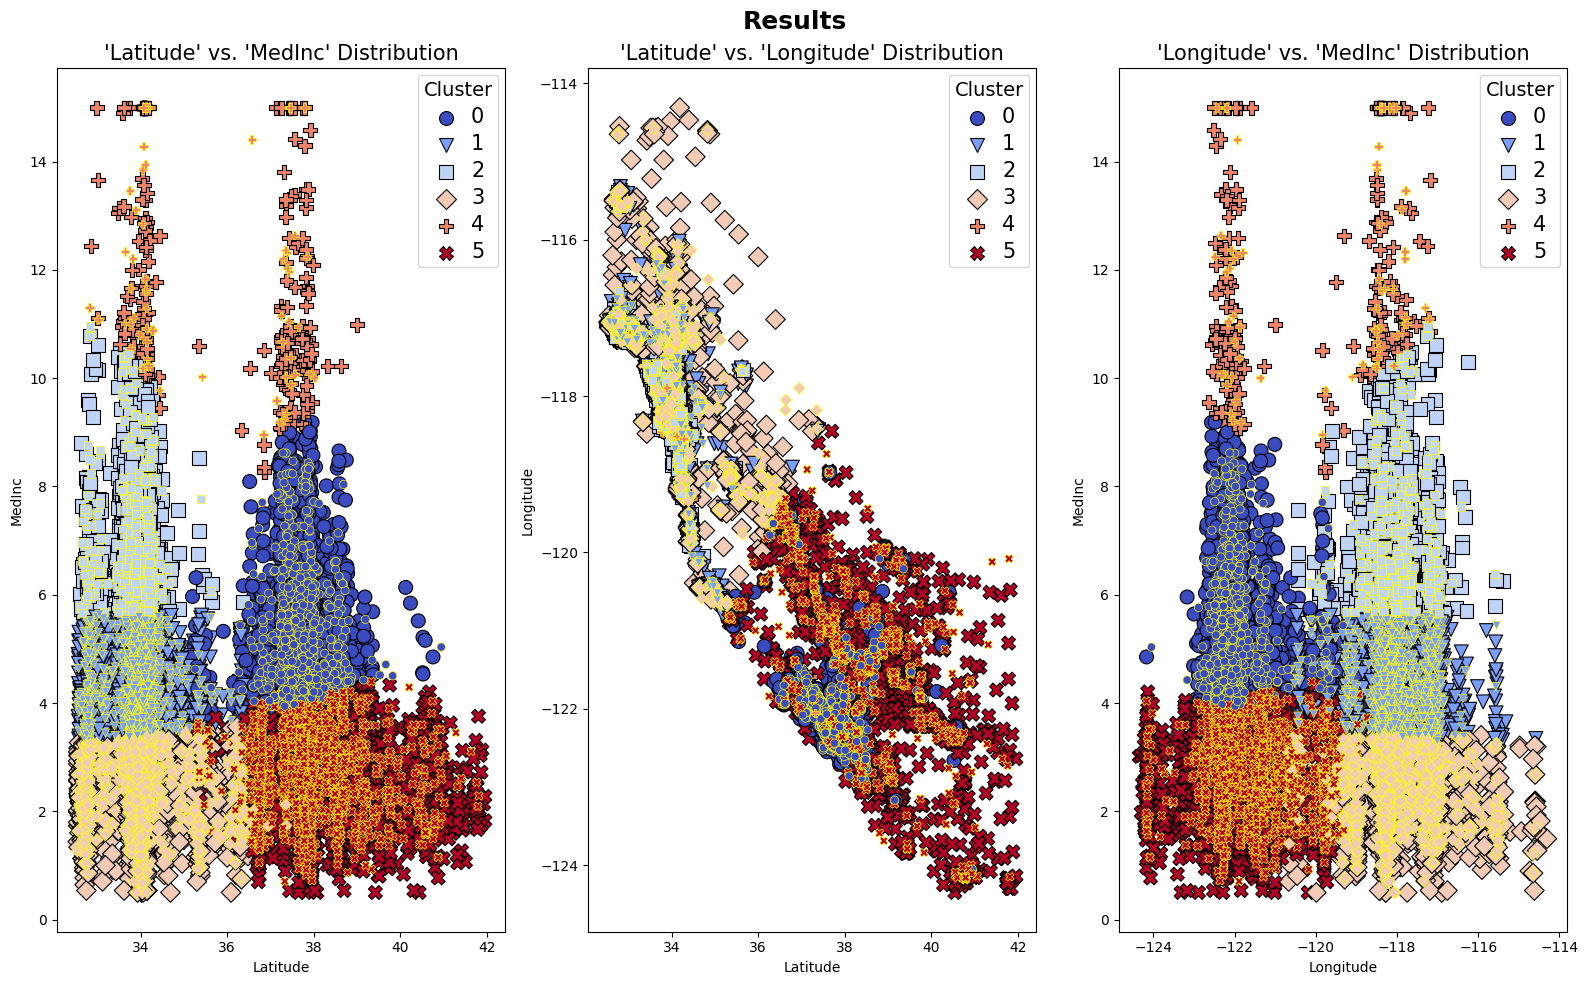

In [106]:
fig, axis = plt.subplots(1, 3, figsize=(16, 10))
fig.suptitle("Results", fontsize=18, fontweight='bold')

markers = {0: "o", 1: "v", 2: "s", 3: "D", 4: "P", 5: "X"}
size = 100 

sns.scatterplot(ax=axis[0], data=X_train, x="Latitude", y="MedInc", hue="Cluster", palette="coolwarm",
                style="Cluster", markers=markers, size="Cluster", sizes={k: size for k in markers},
                legend="full", edgecolor="black", linewidth=0.8)

sns.scatterplot(ax=axis[1], data=X_train, x="Latitude", y="Longitude", hue="Cluster", palette="coolwarm",
                style="Cluster", markers=markers, size="Cluster", sizes={k: size for k in markers},
                legend="full", edgecolor="black", linewidth=0.8)

sns.scatterplot(ax=axis[2], data=X_train, x="Longitude", y="MedInc", hue="Cluster", palette="coolwarm",
                style="Cluster", markers=markers, size="Cluster", sizes={k: size for k in markers},
                legend="full", edgecolor="black", linewidth=0.8)


sns.scatterplot(ax=axis[0], data=X_test, x="Latitude", y="MedInc", hue="Cluster", palette="coolwarm",
                style="Cluster", markers=markers, legend=False, edgecolor="yellow")

sns.scatterplot(ax=axis[1], data=X_test, x="Latitude", y="Longitude", hue="Cluster", palette="coolwarm",
                style="Cluster", markers=markers, legend=False, edgecolor="yellow")

sns.scatterplot(ax=axis[2], data=X_test, x="Longitude", y="MedInc", hue="Cluster", palette="coolwarm",
                style="Cluster", markers=markers, legend=False, edgecolor="yellow")

axis[0].set_title("'Latitude' vs. 'MedInc' Distribution", fontsize=15)
axis[1].set_title("'Latitude' vs. 'Longitude' Distribution", fontsize=15)
axis[2].set_title("'Longitude' vs. 'MedInc' Distribution", fontsize=15)

for ax in axis:
    legend = ax.get_legend()
    if legend:
        for text in legend.texts:
            text.set_fontsize(15)
        legend.set_title(legend.get_title().get_text(), prop={'size': 14})
plt.tight_layout()
plt.show()

4. TRAIN UNSUPERVISED CLASSIFICATION

In [107]:
model_DT = DecisionTreeClassifier(random_state = 42)
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [108]:
tree_rules = export_text(model_DT, feature_names = list(X_train.columns))
print(tree_rules)

|--- Cluster <= 4.50
|   |--- MedInc <= 3.39
|   |   |--- Cluster <= 2.00
|   |   |   |--- class: 1
|   |   |--- Cluster >  2.00
|   |   |   |--- class: 3
|   |--- MedInc >  3.39
|   |   |--- Cluster <= 0.50
|   |   |   |--- class: 0
|   |   |--- Cluster >  0.50
|   |   |   |--- Cluster <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Cluster >  1.50
|   |   |   |   |--- Cluster <= 2.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Cluster >  2.50
|   |   |   |   |   |--- Cluster <= 3.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- Cluster >  3.50
|   |   |   |   |   |   |--- class: 4
|--- Cluster >  4.50
|   |--- class: 5



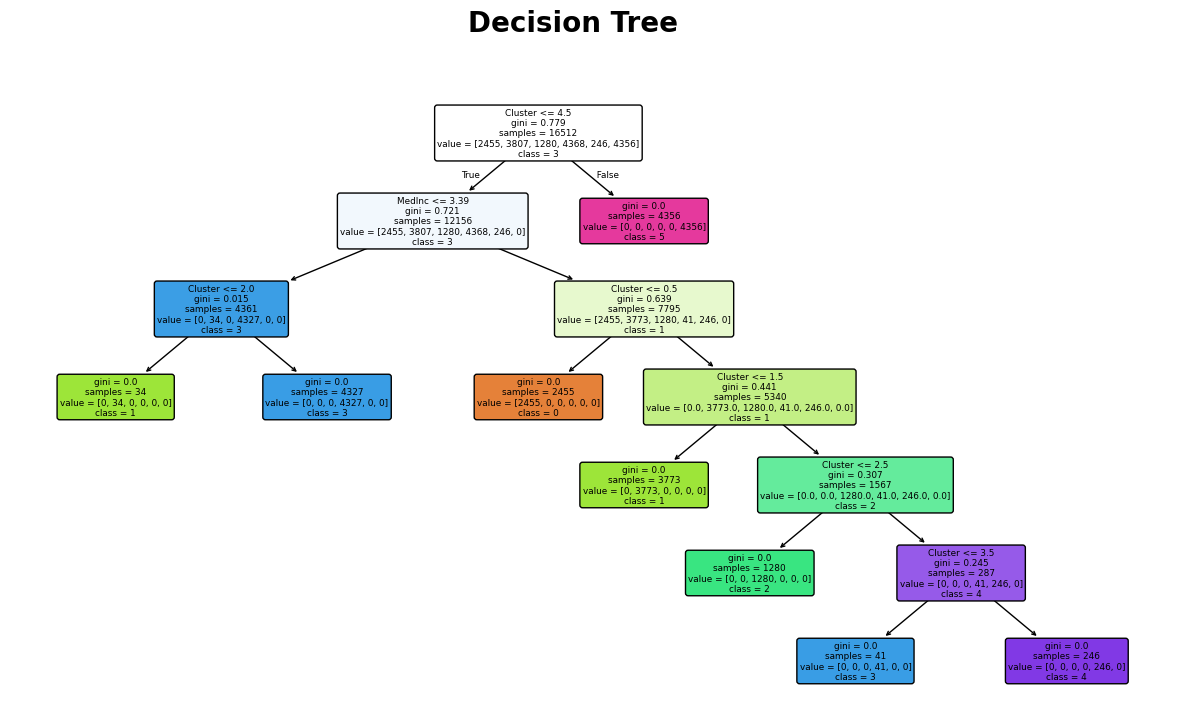

In [117]:
fig = plt.figure(figsize=(15, 8))
plt.rcParams['image.cmap'] = 'coolwarm'
fig.suptitle("Decision Tree", fontsize=20, fontweight='bold')

plot_tree(
    model_DT, 
    feature_names = list(X_train.columns), 
    class_names = ["0", "1", "2", "3", "4", "5"], 
    filled = True, 
    rounded = True)

plt.show()

In [110]:
y_pred = model_DT.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [111]:
accuracy_score(y_test, y_pred)

1.0

In [112]:
kmeans_model_path = "../models/k-means_random_42.sav"
dt_model_path = "../models/decision_tree_classifier_random_42.sav"

os.makedirs("../models", exist_ok=True)

if os.path.exists(kmeans_model_path):
    print(f"K-means model stored at: {kmeans_model_path}")
with open(kmeans_model_path, "wb") as file:
    dump(model, file)

if os.path.exists(dt_model_path):
    print(f"Decision Tree model stored at: {dt_model_path}")
with open(dt_model_path, "wb") as file:
    dump(model_DT, file)


K-means model stored at: ../models/k-means_random_42.sav
Decision Tree model stored at: ../models/decision_tree_classifier_random_42.sav
